In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Checking the version of tensorflow
print(tf.__version__)
# Are we running with Eager execution?
print(tf.executing_eagerly())

2.17.0-dev20240425
True


In [3]:
# Splitting train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
# Now we need to divide them all by 255
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
            #tf.keras.metrics.Precision(name='precision'),
            #tf.keras.metrics.Recall(name='recall')]
)

In [36]:
history = model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8744 - loss: 0.4334 - val_accuracy: 0.9561 - val_loss: 0.1474
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9624 - loss: 0.1294 - val_accuracy: 0.9694 - val_loss: 0.1005
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0836 - val_accuracy: 0.9729 - val_loss: 0.0898
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9819 - loss: 0.0596 - val_accuracy: 0.9760 - val_loss: 0.0821
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0445 - val_accuracy: 0.9770 - val_loss: 0.0773
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9895 - loss: 0.0353 - val_accuracy: 0.9778 - val_loss: 0.0763


In [37]:
predictions = np.argmax(model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step
[7 2 1 ... 4 5 6]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



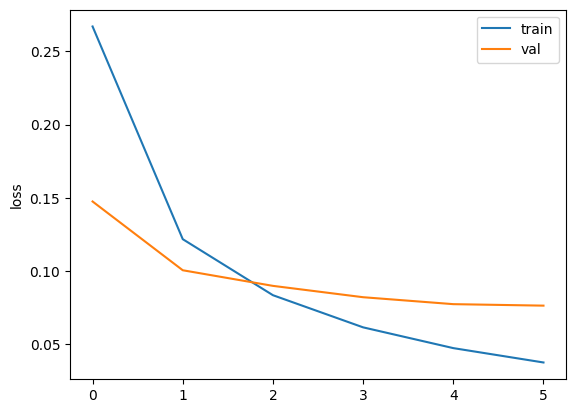

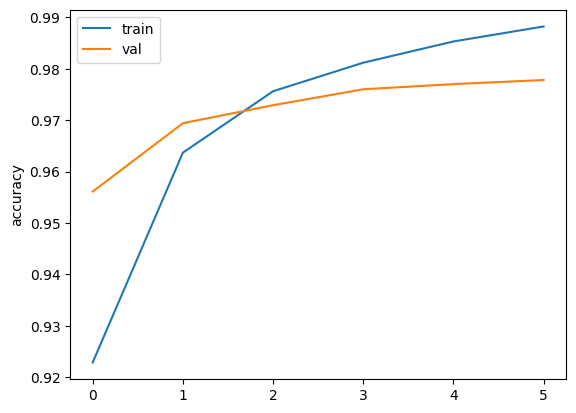

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()